# Sliding Window
Description:
- Handle the input data in a specific window size

Why
- Reduce the use of nested loop and replace it with a single loop
- Reduce the time complexity

Reference
- https://levelup.gitconnected.com/dont-just-leetcode-follow-the-coding-patterns-instead-4beb6a197fdb
- https://www.geeksforgeeks.org/window-sliding-technique/

In [676]:
import pandas as pd
import numpy as np
import random

from typing import List

## Array

### 1. Get all subarray of size k


Use case: we want to build a pricing model based on a data set with data from 2000 to 2009. To estimate the model result when applying it on unseen and up-to-date data, we use sliding windows technique so we can train models with 3 years data and test with 1 years data.

In [474]:
def k_size_windows(arr, k):
    n = len(arr)
    
    if k > n:
        raise ValueError("Invalid K")
    
    windows = []
    for i in range(n-k+1):
        windows.append((arr[i:i+k-1], arr[i+k-1:i+k]))
    return windows

In [616]:
arr = [2000+i for i in range(10)]
k = 4
print("All data:", arr)

All data: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [617]:
k_size_windows(arr, k)

[([2000, 2001, 2002], [2003]),
 ([2001, 2002, 2003], [2004]),
 ([2002, 2003, 2004], [2005]),
 ([2003, 2004, 2005], [2006]),
 ([2004, 2005, 2006], [2007]),
 ([2005, 2006, 2007], [2008]),
 ([2006, 2007, 2008], [2009])]

In [618]:
for res in k_size_windows(arr, k):
    print("Train:", res[0], "Test:", res[1])

Train: [2000, 2001, 2002] Test: [2003]
Train: [2001, 2002, 2003] Test: [2004]
Train: [2002, 2003, 2004] Test: [2005]
Train: [2003, 2004, 2005] Test: [2006]
Train: [2004, 2005, 2006] Test: [2007]
Train: [2005, 2006, 2007] Test: [2008]
Train: [2006, 2007, 2008] Test: [2009]


### 2. Get maximum sum of a subarray of size k
Use case: for a website, we want get the period (30 minutes) of a day that is with maximum usage rate

In [619]:
# Generating a table of hour:minute with random usage rate
# Make 20H with highest usage rate
usage_rate = {"Time":[], "Usage":[]}
for i in range(24):
    for j in range(60):
        hm = str(i).zfill(2)+":"+str(j).zfill(2)
        usage_rate["Time"].append(hm)
        if i == 20:
            usage_rate["Usage"].append(random.randint(8999, 9999))
        else:
            usage_rate["Usage"].append(random.randint(0, 5999))
usage_rate_df = pd.DataFrame(usage_rate)

In [620]:
usage_rate_df.head()

,Time,Usage
0,00:00,229
1,00:01,5594
2,00:02,756
3,00:03,170
4,00:04,2539


In [621]:
k = 30
def max_sum(df, index, value, k):
    arr = df[value].values
    times = df[index].values

    n = len(arr)
    
    if k > n:
        raise ValueError("Invalid K")
    
    window_sum = sum(arr[:k])
    max_sum = window_sum
    max_time = times[:k]
    for i in range(n - k):
        window_sum = window_sum - arr[i] + arr[i+k]
        
        if window_sum > max_sum:
            max_sum = window_sum
            max_time = times[i+1:i+k+1]
            
            
    return max_sum, max_time

<AxesSubplot:xlabel='Time'>

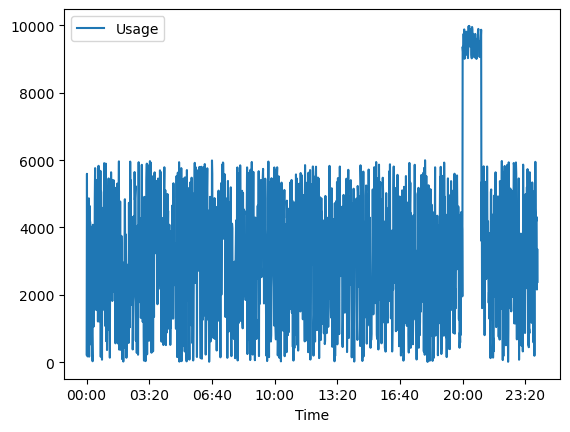

In [622]:
usage_rate_df.plot(x="Time", y="Usage")

In [623]:
max_sum(usage_rate_df, "Time", "Usage", 30)

(286056,
 array(['20:04', '20:05', '20:06', '20:07', '20:08', '20:09', '20:10',
        '20:11', '20:12', '20:13', '20:14', '20:15', '20:16', '20:17',
        '20:18', '20:19', '20:20', '20:21', '20:22', '20:23', '20:24',
        '20:25', '20:26', '20:27', '20:28', '20:29', '20:30', '20:31',
        '20:32', '20:33'], dtype=object))

### 3. Fruit Into Baskets
Given an array of integers, find the longest subarray that contains at most 2 unique integers.
https://leetcode.com/problems/fruit-into-baskets/

In [677]:
def totalFruit(self, fruits: List[int]) -> int:
    # Dictionary to store fruit types and its count
    counter = {}
    removed_i = 0 # Remove from first item
    max_count = 0 # Max count

    # Count from the first item
    for idx, fruit in enumerate(fruits):
        # Count the number for every fruit type (int)
        counter[fruit] = counter.get(fruit, 0) + 1

        # When the number of unique fruit type is more than 2,
        # means that counter has more than 2 items,
        while len(counter) > 2:
            # Deduct the count from the first item of the window
            counter[fruits[removed_i]] -=1
            # Remove the fruit type if the count is 0
            if counter[fruits[removed_i]] == 0:
                del counter[fruits[removed_i]]
            removed_i += 1
        # Update the max count
        max_count = max(max_count, idx-removed_i+1)
    # Return the max number that we can collect
    return max_count

## String

### 1. Find the longest substring with k unique characters in a given string
Given a string you need to print longest possible substring that has exactly M unique characters. If there are more than one substring of longest possible length, then print any one of them.

Examples: 

    Input: Str = “aabbcc”, k = 1
    Output: 2
    Explanation: Max substring can be any one from {“aa” , “bb” , “cc”}.

    Input: Str = “aabbcc”, k = 2
    Output: 4
    Explanation: Max substring can be any one from {“aabb” , “bbcc”}.

    Input: Str = “aabbcc”, k = 3
    Output: 6
    Explanation: 
    There are substrings with exactly 3 unique characters
    {“aabbcc” , “abbcc” , “aabbc” , “abbc” }
    Max is “aabbcc” with length 6.

    Input: Str = “aaabbb”, k = 3
    Output: Not enough unique characters
    Explanation: There are only two unique characters, thus show error message. 

Source: Google Interview Question.

In [686]:
len(set('aaabbb'))

2

In [687]:
def get_longest_substring(string: str, k: int) -> int:
    counter = {}
    removed_i = 0
    max_length = 0
    
    if len(set(string)) < k:
        return "Not enough unique characters"
    
    for idx, c in enumerate(string):
        counter[c] = counter.get(c, 0) + 1
        
        while len(counter) > k:
            counter[string[removed_i]] -= 1
            if counter[string[removed_i]] == 0:
                del counter[string[removed_i]]
            removed_i += 1
        max_length = max(max_length, idx-removed_i+1)
    return max_length


Strs = ['aabbcc', 'aabbcc', 'aabbcc', "aaabbb"]
ks = [1, 2, 3, 3]
for s, k in zip(Strs, ks):
    print(s, k, get_longest_substring(s, k))

aabbcc 1 2
aabbcc 2 4
aabbcc 3 6
aaabbb 3 Not enough unique characters


## HashTable